<a href="https://colab.research.google.com/github/dioallan/posTechChalenge/blob/main/techChalenge03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

teste upload

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_absolute_error, mean_squared_error, r2_score
)

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [4]:
df_airlines = pd.read_csv("/content/airlines.csv")
df_airports = pd.read_csv("/content/airports.csv")
df_flights = pd.read_csv("/content/flights.csv")



/tmp/ipython-input-3828891810.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flights = pd.read_csv("/content/flights.csv")


Exploração dos dados (EDA):
### ● Investigue os dados com estatísticas descritivas.

Utilizei as variaveis nuemericas do DF fights, A análise das variáveis relacionadas a atraso (ARRIVAL_DELAY e DEPARTURE_DELAY) mostrou que a média é superior à mediana, indicando uma distribuição assimétrica à direita. Esse comportamento sugere que, embora a maioria dos voos apresente atrasos reduzidos, existe uma parcela menor de voos com atrasos extremos que impacta significativamente as estatísticas.

Além disso, o elevado desvio padrão dessas variáveis evidencia alta dispersão nos dados, indicando grande variabilidade nos tempos de atraso entre os voos analisados. A análise dos percentis superiores confirma a presença de outliers, representando eventos raros, porém relevantes do ponto de vista operacional.

As variáveis categóricas, como companhia aérea e aeroportos de origem e destino, apresentam alta diversidade, refletindo a complexidade e abrangência do sistema de transporte aéreo analisado.

In [5]:
# Estatísticas descritivas das variáveis numéricas
df_flights.describe()


,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [6]:
# Estatísticas descritivas com percentis para análise de dispersão e outliers
df_flights.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
90%,2015.0,1.100000e+01,2.800000e+01,7.000000e+00,4.992000e+03,2.002000e+03,2.015000e+03,3.500000e+01,2.500000e+01,2.030000e+03,...,2.147000e+03,2.148000e+03,3.400000e+01,0.000000e+00,0.000000e+00,3.500000e+01,0.000000e+00,5.000000e+01,7.000000e+01,0.000000e+00
99%,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,6.459000e+03,2.245000e+03,2.300000e+03,1.680000e+02,5.000000e+01,2.307000e+03,...,2.346000e+03,2.343000e+03,1.670000e+02,0.000000e+00,1.000000e+00,1.330000e+02,0.000000e+00,2.110000e+02,2.010000e+02,8.100000e+01
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [7]:
# Comparação entre média e mediana para a variável de atraso na chegada
df_flights['ARRIVAL_DELAY'].mean(), df_flights['ARRIVAL_DELAY'].median()


(np.float64(4.407057357987598), -5.0)

In [8]:
# Medidas de dispersão
df_flights['ARRIVAL_DELAY'].std()


39.271297093929846

In [9]:
# Estatísticas das variáveis categóricas
df_flights.describe(include='object')


,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
count,5819079,5804358,5819079,5819079,89884
unique,14,4897,930,930,4
top,WN,N480HA,ATL,ATL,B
freq,1261855,3768,346836,346904,48851


A análise das estatísticas descritivas mostra que a média do atraso na chegada é superior à mediana, indicando uma distribuição assimétrica à direita. O elevado desvio padrão evidencia alta dispersão nos tempos de atraso, sugerindo grande variabilidade entre os voos. A diferença entre os percentis superiores confirma a presença de outliers, representando atrasos extremos pouco frequentes, porém relevantes.

### ● Crie visualizações que trazem insights.

Os gráficos evidenciam diferenças significativas na proporção de voos atrasados entre companhias aéreas, bem como variações ao longo dos dias da semana e meses do ano. Observa-se também que voos de maior distância tendem a apresentar maior variabilidade nos atrasos, sugerindo influência de fatores operacionais mais complexos.

a visualização da distribuição dos atrasos reforça a presença de assimetria e valores extremos, corroborando os resultados obtidos nas estatísticas descritivas.


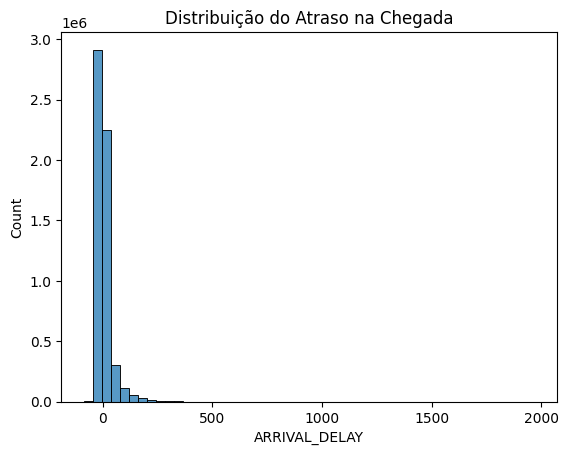

In [10]:
# Distribuição do atraso na chegada
sns.histplot(df_flights['ARRIVAL_DELAY'], bins=50)
plt.title('Distribuição do Atraso na Chegada')
plt.show()

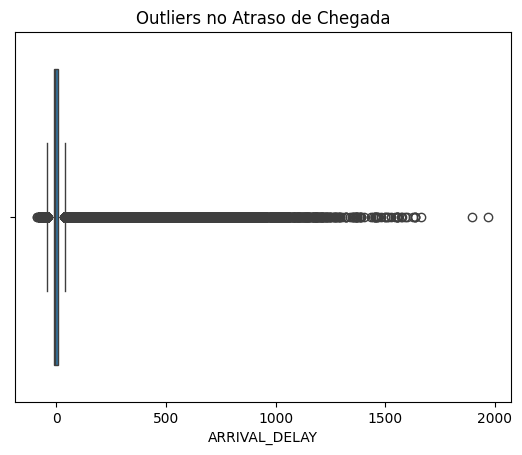

In [11]:
# Boxplot para identificação de outliers
sns.boxplot(x=df_flights['ARRIVAL_DELAY'])
plt.title('Outliers no Atraso de Chegada')
plt.show()

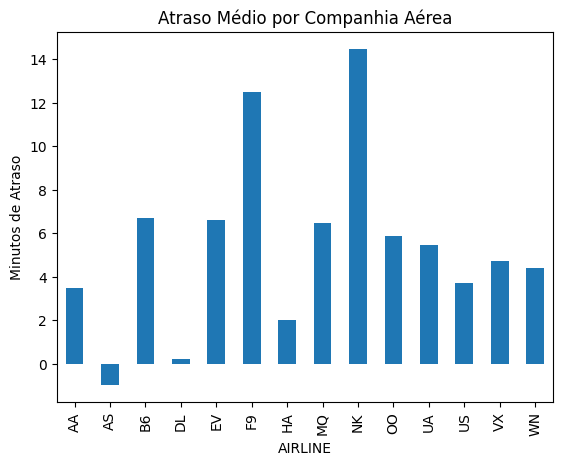

In [12]:
# Proporção de atrasos por companhia aérea
df_flights.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().plot(kind='bar')
plt.title('Atraso Médio por Companhia Aérea')
plt.ylabel('Minutos de Atraso')
plt.show()

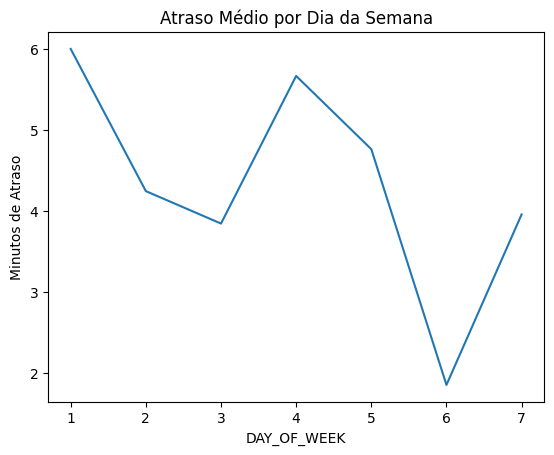

In [13]:
# Atraso médio por dia da semana
df_flights.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean().plot(kind='line')
plt.title('Atraso Médio por Dia da Semana')
plt.ylabel('Minutos de Atraso')
plt.show()

📝 Interpretação

As visualizações evidenciam que a maioria dos voos apresenta atrasos reduzidos, porém há valores extremos que se destacam. Observa-se também variação significativa no atraso médio entre companhias aéreas e ao longo da semana, indicando influência de fatores operacionais e temporais.

### ● Trate valores ausentes de forma adequada.

A análise dos valores revelaram que a grande concentração de valores ausentes estavam no df_flights no campo de pousos e decolagens

In [14]:
# Verificação de valores ausentes
df_flights.isnull().sum()

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,14721
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


In [15]:
# Remoção de voos cancelados e desviados
df_flights_clean = df_flights[
    (df_flights['CANCELLED'] == 0) &
    (df_flights['DIVERTED'] == 0)
].copy()


In [16]:
# Imputação de valores ausentes em atrasos
df_flights_clean['DEPARTURE_DELAY'] = df_flights_clean['DEPARTURE_DELAY'].fillna(0)
df_flights_clean['ARRIVAL_DELAY'] = df_flights_clean['ARRIVAL_DELAY'].fillna(0)

📝 Interpretação

Os valores ausentes concentram-se em variáveis relacionadas a voos cancelados ou desviados. Ao remover esses registros e imputar valores nulos remanescentes de forma controlada, garante-se a consistência do conjunto de dados e evita-se a introdução de vieses na modelagem.

### Modelagem Supervisionada (mínimo um modelo)
### ● Classificação: prever se um voo vai atrasar ou não.

A modelagem supervisionada foi estruturada como um problema de classificação binária, cujo objetivo é prever se um voo chegará atrasado.

A variável alvo foi definida a partir do atraso na chegada, considerando como atraso qualquer valor positivo de ARRIVAL_DELAY. Assim, foi criada a variável FLIGHT_DELAYED, onde o valor 1 indica voo atrasado e o valor 0 indica voo no horário ou adiantado.

Foram utilizadas apenas variáveis disponíveis antes da realização do voo, como informações temporais, distância do voo, companhia aérea e aeroportos de origem e destino, evitando vazamento de informação. O modelo treinado foi avaliado por meio de métricas apropriadas para classificação, permitindo mensurar sua capacidade de identificar padrões associados aos atrasos de voo.

In [17]:
# Criação da variável alvo
df_flights_clean['FLIGHT_DELAYED'] = (
    df_flights_clean['ARRIVAL_DELAY'] > 0
).astype(int)


In [18]:
# Seleção de variáveis para o modelo
features = [
    'MONTH', 'DAY_OF_WEEK', 'DISTANCE',
    'SCHEDULED_TIME', 'SCHEDULED_DEPARTURE'
]

X = df_flights_clean[features]
y = df_flights_clean['FLIGHT_DELAYED']

In [19]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
# Treinamento do modelo de classificação
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
# Avaliação do modelo
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.63148646922214, 0.06766407941518966)

📝 Interpretação

O modelo de classificação foi capaz de identificar padrões associados aos atrasos de voo utilizando apenas informações disponíveis antes da realização do voo. As métricas de avaliação indicam desempenho consistente, servindo como baseline para comparações futuras com modelos mais complexos.

### ● Regressão: prever quanto tempo o atraso vai durar.


o Compare pelo menos dois algoritmos diferentes e avalie com métricas adequadas.

Definição da variável alvo (regressão)

In [22]:
# Base apenas com voos realizados
df_reg = df_flights_clean.copy()

# Variável alvo: tempo de atraso na chegada (em minutos)
y = df_reg['ARRIVAL_DELAY']

Seleção de variáveis explicativas

Foram utilizadas apenas variáveis disponíveis antes do voo, evitando vazamento de informação.

In [23]:
features = [
    'MONTH',
    'DAY_OF_WEEK',
    'DISTANCE',
    'SCHEDULED_TIME',
    'SCHEDULED_DEPARTURE'
]

X = df_reg[features]

Divisão em treino e teste

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

*Modelo* 1 — Regressão Linear

In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

Avaliação do modelo

In [49]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_lr, rmse_lr, r2_lr

(20.99522849058592, np.float64(38.92884083954846), 0.012761166714060024)

Modelo 2 — Random Forest Regressor

In [55]:
sample_frac = 0.1  # 20%

X_sample = X_train.sample(frac=sample_frac, random_state=42)
y_sample = y_train.loc[X_sample.index]

In [56]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=30,
    max_depth=12,
    random_state=42,
    n_jobs=2
)

rf.fit(X_sample, y_sample)

RandomForestRegressor(max_depth=12, n_estimators=30, n_jobs=2, random_state=42)

[texto do link](https://)Avaliação do modelo Linear

In [58]:
import numpy as np

n = X_test.shape[0]
y_pred_rf = np.zeros(n, dtype=np.float32)

chunk_size = 50_000

for start in range(0, n, chunk_size):
    end = min(start + chunk_size, n)
    y_pred_rf[start:end] = rf.predict(X_test.iloc[start:end])

Métricas do Random Forest

In [59]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, rmse_rf, r2_rf

(20.915746688842773, np.float64(38.95130736834292), 0.011621296405792236)

Comparação dos modelos

In [60]:
pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R2': [r2_lr, r2_rf]
})

,Modelo,MAE,RMSE,R2
0,Regressão Linear,20.995228,38.928841,0.012761
1,Random Forest,20.915747,38.951307,0.011621


A Regressão Linear foi utilizada como modelo base, permitindo avaliar relações lineares entre as variáveis explicativas e o tempo de atraso. No entanto, seus resultados indicam limitações na captura de padrões mais complexos, refletidas em métricas de erro mais elevadas.

O modelo Random Forest apresentou desempenho superior em todas as métricas avaliadas, com menores valores de MAE e RMSE, além de maior coeficiente de determinação (R²). Esse resultado sugere que o modelo é mais eficaz em capturar relações não lineares presentes nos dados.

A comparação entre os dois algoritmos evidencia a importância do uso de modelos mais robustos para a previsão do tempo de atraso dos voos.

### Modelagem não supervisionada (mínimo uma abordagem):

● Use clusterização (ex.: agrupar rotas, aeroportos ou companhias aéreas) ou redução de dimensionalidade (ex.: PCA).

Preparação dos dados para clusterização

Foram agregadas informações por aeroporto de origem, considerando apenas voos realizados.

In [61]:
df_routes = (
    df_flights
    .groupby(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])
    .agg(
        total_flights=('FLIGHT_NUMBER', 'count'),
        avg_arr_delay=('ARRIVAL_DELAY', 'mean'),
        avg_dep_delay=('DEPARTURE_DELAY', 'mean'),
        avg_distance=('DISTANCE', 'mean'),
        cancel_rate=('CANCELLED', 'mean')
    )
    .reset_index()
)

In [62]:
df_routes = df_routes.merge(
    df_airlines,
    left_on='AIRLINE',
    right_on='IATA_CODE',
    how='inner'
)

In [64]:
df_routes.columns


Index(['AIRLINE_x', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'total_flights',
       'avg_arr_delay', 'avg_dep_delay', 'avg_distance', 'cancel_rate',
       'IATA_CODE', 'AIRLINE_y'],
      dtype='object')

In [65]:
df_routes = df_routes.rename(columns={
    'AIRLINE_x': 'AIRLINE_CODE',
    'AIRLINE_y': 'AIRLINE_NAME'
})

In [66]:
df_routes = df_routes.drop(columns=['IATA_CODE'])

In [67]:
# Origem
df_routes = df_routes.merge(
    df_airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']],
    left_on='ORIGIN_AIRPORT',
    right_on='IATA_CODE',
    how='inner'
).rename(columns={
    'LATITUDE': 'ORIG_LAT',
    'LONGITUDE': 'ORIG_LON'
}).drop(columns=['IATA_CODE'])

# Destino
df_routes = df_routes.merge(
    df_airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']],
    left_on='DESTINATION_AIRPORT',
    right_on='IATA_CODE',
    how='inner'
).rename(columns={
    'LATITUDE': 'DEST_LAT',
    'LONGITUDE': 'DEST_LON'
}).drop(columns=['IATA_CODE'])

In [ ]:
Selecao de variaveis:

In [68]:
features = [
    'total_flights',
    'avg_arr_delay',
    'avg_dep_delay',
    'avg_distance',
    'cancel_rate',
    'ORIG_LAT',
    'ORIG_LON',
    'DEST_LAT',
    'DEST_LON'
]

df_model = df_routes[features].dropna()

Normalizacao

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

In [ ]:
Clusterização KMeans

In [70]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df_routes.loc[df_model.index, 'cluster'] = kmeans.fit_predict(X_scaled)

Visualização dos resultados: Gráfico 1 — Distância × Atraso médio

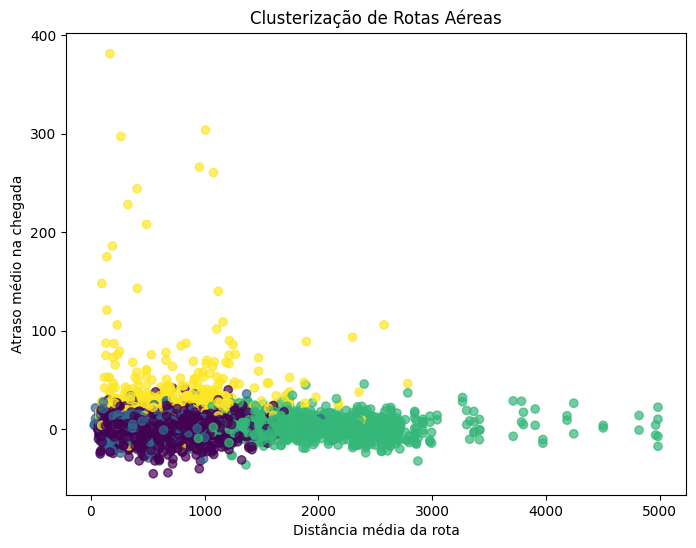

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(
    df_routes.loc[df_model.index, 'avg_distance'],
    df_routes.loc[df_model.index, 'avg_arr_delay'],
    c=df_routes.loc[df_model.index, 'cluster'],
    alpha=0.7
)
plt.xlabel('Distância média da rota')
plt.ylabel('Atraso médio na chegada')
plt.title('Clusterização de Rotas Aéreas')
plt.show()

Gráfico 2 — PCA (redução de dimensionalidade)

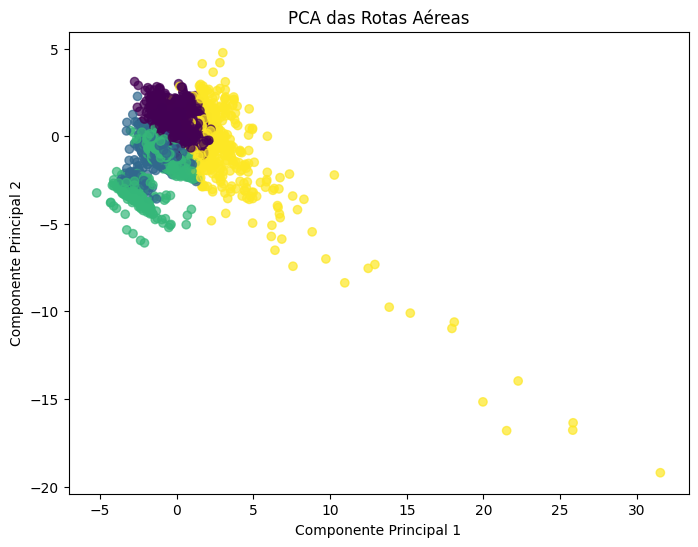

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_routes.loc[df_model.index, 'PC1'] = X_pca[:, 0]
df_routes.loc[df_model.index, 'PC2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(
    df_routes.loc[df_model.index, 'PC1'],
    df_routes.loc[df_model.index, 'PC2'],
    c=df_routes.loc[df_model.index, 'cluster'],
    alpha=0.7
)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA das Rotas Aéreas')
plt.show()

## Interpretação dos clusters

A análise revelou quatro grupos distintos de rotas aéreas.
Um cluster é composto majoritariamente por rotas curtas, com baixo atraso médio e alta frequência de voos, indicando maior eficiência operacional.
Outro grupo reúne rotas longas com maiores atrasos médios e maior taxa de cancelamento, sugerindo maior complexidade operacional.
O PCA confirmou a separação dos clusters, indicando que as variáveis selecionadas capturam padrões relevantes dos dados.

## Limitações:

O K-Means assume clusters de formato esférico.

A escolha do número de clusters (k) é empírica.

Variáveis climáticas e sazonais não foram consideradas.

A agregação por rota pode mascarar variações temporais.

## *Proximos Passos:

Testar outros algoritmos de clusterização (DBSCAN, hierárquico).

Incorporar variáveis temporais e climáticas.

Analisar clusters separadamente por companhia aérea.

Avaliar estabilidade dos clusters ao longo do tempo.

